In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data

In [3]:
#df = pd.read_csv('MERGED2017_18_PP.csv')
df_2 = pd.read_csv('MERGED2018_19_PP.csv') 
df = pd.read_csv('MERGED2014_15_PP.csv')

C:\Users\Judy Zeng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Judy Zeng\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6,1537,1540,1542,1575,1589,1606,1610,1614,1615,1729,1909,1910,1911,1912,1913) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Renaming Data Values

In [4]:
control_value = ''
def clean_control(control_code):
    if control_code == 1:
        control_value = 'public'
    elif control_code == 2 or 3:
        control_value = 'private'
    else:
        control_value = 'NaN'
    return(control_value)

In [5]:
region_value = ''
def clean_region(region_code):
    if region_code == 1:
        region_value = 'new england'
    elif region_code == 2:
        region_value = 'mid east'
    elif region_code == 3:
        region_value = 'great lakes'
    elif region_code == 4:
        region_value = 'plains'
    elif region_code == 5:
        region_value = 'southeast'
    elif region_code == 6:
        region_value = 'southwest'
    elif region_code == 7:
        region_value = 'rocky mountains'
    elif region_code == 8:
        region_value = 'far west'
    else:
        region_value = 'other'
    return region_value

In [6]:
pbi_value = ''
def clean_pbi(pbi_code):
    if pbi_code == 1:
            pbi_value = 'pbi'
    else:
        pbi_value = 'not pbi'
    return pbi_value

hbcu_value = ''
def clean_hbcu(hbcu_code):
    if hbcu_code == 1:
            hbcu_value = 'hbcu'
    else:
        hbcu_value = 'not hbcu'
    return hbcu_value

In [7]:
earnings_value = ''
def clean_earnings(earnings_code):
    if earnings_code.isnumeric() == False:
        earnings_value = 0
    else:
        earnings_value = earnings_code
    return earnings_value

## Creating Dataframes

In [8]:
df['white_enroll'] = df['UGDS_WHITE']
df['black_enroll'] = df['UGDS_BLACK']
df['hispanic_enroll'] = df['UGDS_HISP']
df['asian_enroll'] = df['UGDS_ASIAN']
df['city'] = df['CITY']
df['state'] = df['STABBR']
df['control'] = df['CONTROL'].apply(clean_control)
df['avg_sat'] = df['SAT_AVG']
df['region'] = df['REGION'].apply(clean_region)
df['house_inc'] = df['MEDIAN_HH_INC']
df['adm_rate'] = df['ADM_RATE']
df_2['pbi'] = df_2['PBI'].apply(clean_pbi)
df_2['hbcu'] = df_2['HBCU'].apply(clean_hbcu)
df_2['name'] = df['INSTNM']
df['loan'] = df['PCTFLOAN']
df['name'] = df['INSTNM']
df['earnings'] = df['MN_EARN_WNE_P10'].dropna().apply(clean_earnings).astype('float')

# Creating clean dataframes

df_clean = df[['white_enroll', 'black_enroll', 'hispanic_enroll', 'asian_enroll','city', 'state', 'avg_sat','control','region','adm_rate', 'name', 'loan', 'earnings']]
df_2_clean = df_2[['pbi', 'name', 'hbcu']]

## Merging Data

In [9]:
df_merge = df_2_clean.dropna(subset=['pbi','hbcu'])
df_merge = pd.merge(df_clean, df_2_clean, how='inner', on='name')

pbi_count = pd.crosstab(df_merge.region, df_merge.pbi)
hbcu_count = pd.crosstab(df_merge.region, df_merge.hbcu)

In [27]:
df_merge.groupby(['region']).count()['name']

region
far west            972
great lakes        1085
mid east           1133
new england         418
other               166
plains              643
rocky mountains     309
southeast          1706
southwest           738
Name: name, dtype: int64

## Findings

### Admission Rate vs Race Enrollment

#### White Enrollment

<ipython-input-50-947cc8242709>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Stanford', xy=(0.3752, 0.0509), xytext=(0.35, 0.01),arrowprops = dict(facecolor ='green', shrink = 0.1))
<ipython-input-50-947cc8242709>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Harvard', xy=(0.4527, 0.0596), xytext=(0.5, 0.01), arrowprops = dict(facecolor ='blue', shrink = 0.05))


<AxesSubplot:xlabel='white_enroll', ylabel='adm_rate'>

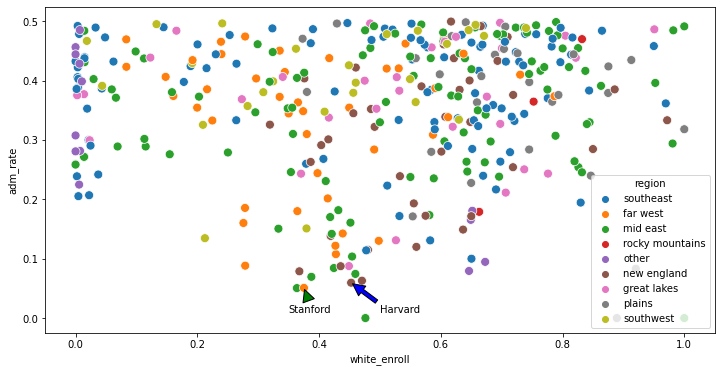

In [50]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]

plt.figure(figsize=(12,6))
plt.annotate(s='Stanford', xy=(0.3752, 0.0509), xytext=(0.35, 0.01),arrowprops = dict(facecolor ='green', shrink = 0.1))
plt.annotate(s='Harvard', xy=(0.4527, 0.0596), xytext=(0.5, 0.01), arrowprops = dict(facecolor ='blue', shrink = 0.05))
sns.scatterplot(x='white_enroll', y='adm_rate',hue='region',data=adm, s=80)

<AxesSubplot:xlabel='white_enroll', ylabel='adm_rate'>

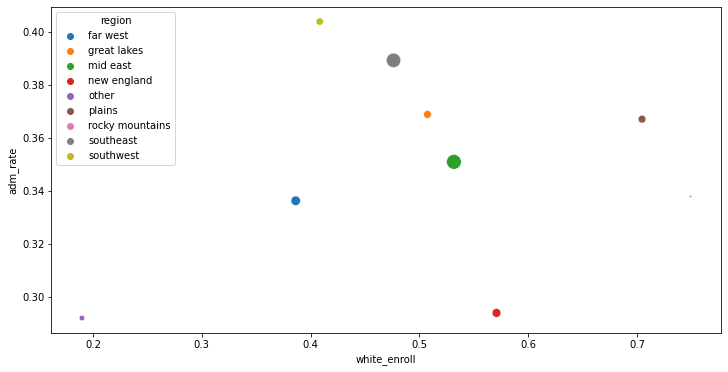

In [59]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm2 = adm.groupby(['region']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='white_enroll', y='adm_rate',hue='region',data=adm2, s=adm.groupby(['region']).count()['name']*2)

#### Black Enrollment

<ipython-input-56-570a197b273d>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Stanford', xy=(0.0591, 0.0509),  xytext=(0.01, 0.01), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-56-570a197b273d>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Harvard', xy=(0.0681, 0.0596), xytext=(0.08, 0.03), arrowprops = dict(facecolor ='blue', shrink = 0.05))


<AxesSubplot:xlabel='black_enroll', ylabel='adm_rate'>

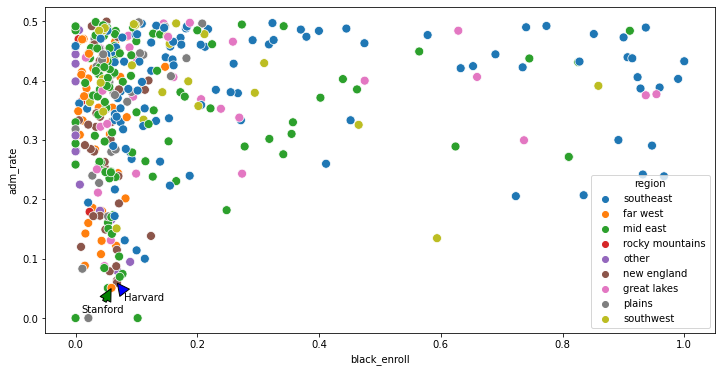

In [56]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]

plt.figure(figsize=(12,6))
plt.annotate(s='Stanford', xy=(0.0591, 0.0509),  xytext=(0.01, 0.01), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='Harvard', xy=(0.0681, 0.0596), xytext=(0.08, 0.03), arrowprops = dict(facecolor ='blue', shrink = 0.05))
sns.scatterplot(x='black_enroll', y='adm_rate',hue='region',data=adm,s=80)

<AxesSubplot:xlabel='black_enroll', ylabel='adm_rate'>

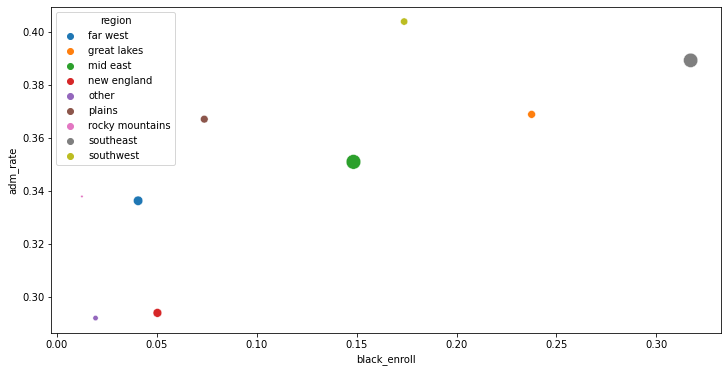

In [58]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm2 = adm.groupby(['region']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='black_enroll', y='adm_rate',hue='region',data=adm2,s=adm.groupby(['region']).count()['name']*2)

#### Hispanic Enrollment

<ipython-input-61-371042d580ec>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Stanford', xy=(0.1607, 0.0509), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-61-371042d580ec>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Harvard', xy=(0.0984, 0.0596), xytext=(0.07, 0.02), arrowprops = dict(facecolor ='blue', shrink = 0.05))


<AxesSubplot:xlabel='hispanic_enroll', ylabel='adm_rate'>

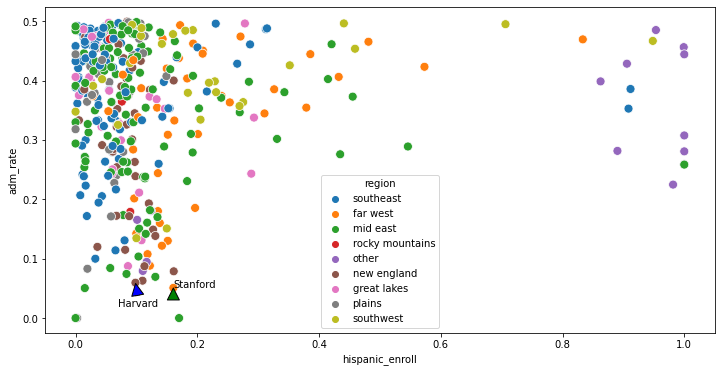

In [61]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]

plt.figure(figsize=(12,6))
plt.annotate(s='Stanford', xy=(0.1607, 0.0509), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='Harvard', xy=(0.0984, 0.0596), xytext=(0.07, 0.02), arrowprops = dict(facecolor ='blue', shrink = 0.05))
sns.scatterplot(x='hispanic_enroll', y='adm_rate',hue='region',data=adm, s=80)

<AxesSubplot:xlabel='hispanic_enroll', ylabel='adm_rate'>

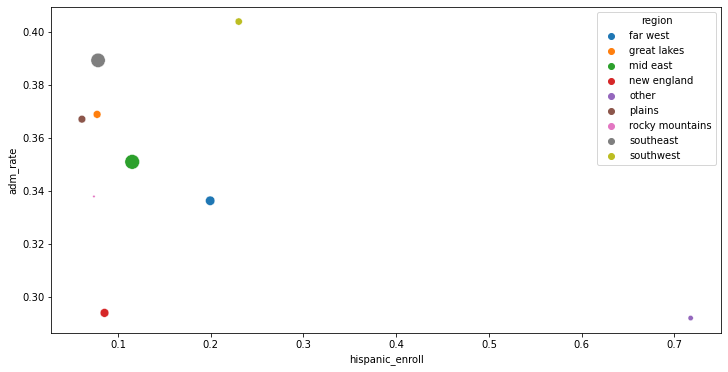

In [62]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm2 = adm.groupby(['region']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='hispanic_enroll', y='adm_rate',hue='region',data=adm2, s=adm.groupby(['region']).count()['name']*2)

#### Asian Enrollment

<ipython-input-64-ad07ef2d48f9>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Stanford', xy=(0.1979, 0.0509), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-64-ad07ef2d48f9>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Harvard', xy=(0.1801, 0.0596), xytext=(0.15, 0.02), arrowprops = dict(facecolor ='blue', shrink = 0.05))


<AxesSubplot:xlabel='asian_enroll', ylabel='adm_rate'>

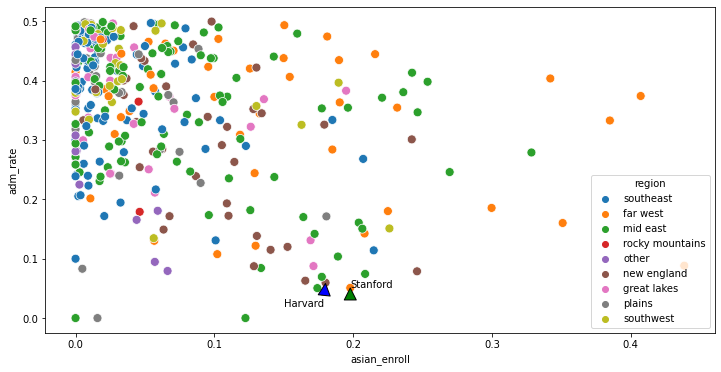

In [64]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]

plt.figure(figsize=(12,6))
plt.annotate(s='Stanford', xy=(0.1979, 0.0509), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='Harvard', xy=(0.1801, 0.0596), xytext=(0.15, 0.02), arrowprops = dict(facecolor ='blue', shrink = 0.05))
sns.scatterplot(x='asian_enroll', y='adm_rate',hue='region',data=adm, s=80)

<AxesSubplot:xlabel='asian_enroll', ylabel='adm_rate'>

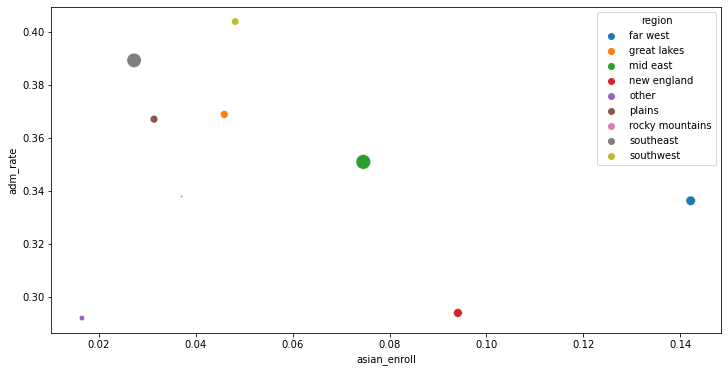

In [65]:
adm = df_merge.dropna(subset=['adm_rate'])
adm = adm[adm.adm_rate<0.5]
adm2 = adm.groupby(['region']).mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='asian_enroll', y='adm_rate',hue='region',data=adm2, s=adm.groupby(['region']).count()['name']*2)

### Earnings vs Race Enrollment

#### White Enrollment

<ipython-input-28-691b30d8a669>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='CalTech', xy=(0.2787, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-28-691b30d8a669>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Georgetown University', xy=(0.5813, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-28-691b30d8a669>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='SUNY Downstate Health Sciences University', xy=(0.3905, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-in

<AxesSubplot:xlabel='white_enroll', ylabel='earnings'>

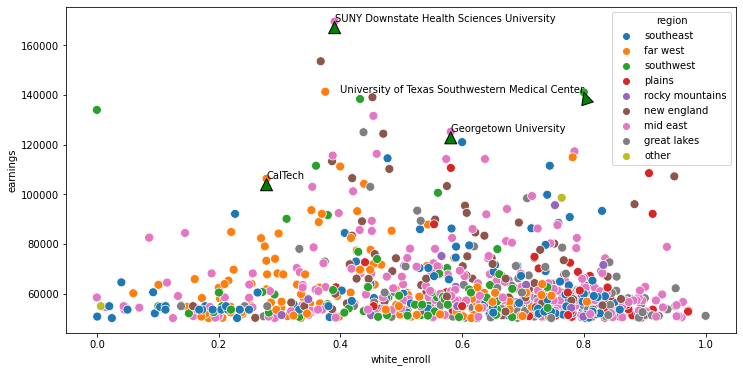

In [28]:
earn = df_merge.dropna(subset=['earnings','white_enroll'])
earn = earn[earn.earnings>50000]

plt.figure(figsize=(12,6))
plt.annotate(s='CalTech', xy=(0.2787, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='Georgetown University', xy=(0.5813, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='SUNY Downstate Health Sciences University', xy=(0.3905, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='University of Texas Southwestern Medical Center', xy=(0.8000, 141100.0), xytext=(0.4, 141100), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='white_enroll', y='earnings',hue='region',data=earn, s=80)

<AxesSubplot:xlabel='white_enroll', ylabel='earnings'>

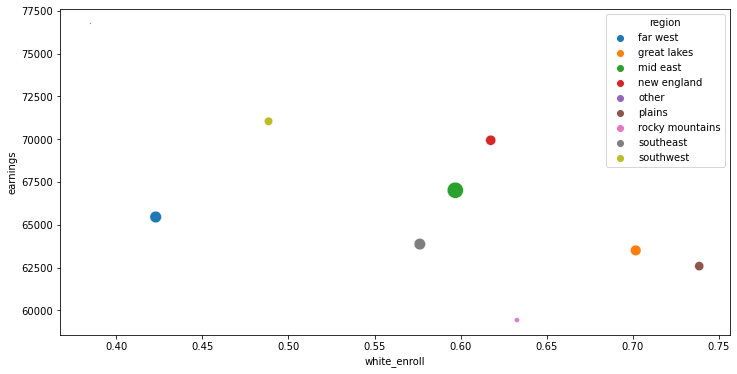

In [31]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn2 = earn.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='white_enroll', y='earnings',hue='region',data=earn2, s=earn.groupby(['region']).count()['name'])

#### Black Enrollment

<ipython-input-32-d7cf64803720>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='CalTech', xy=(0.0153, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-32-d7cf64803720>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Georgetown University', xy=(0.0618, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-32-d7cf64803720>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='SUNY Downstate Health Sciences University', xy=(0.2189, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-in

<AxesSubplot:xlabel='black_enroll', ylabel='earnings'>

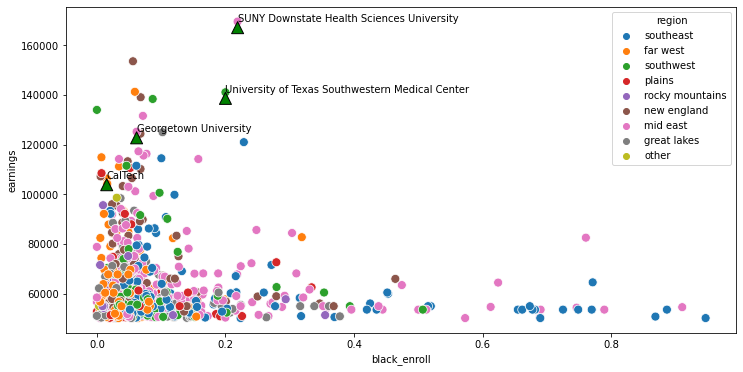

In [32]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]

plt.figure(figsize=(12,6))
plt.annotate(s='CalTech', xy=(0.0153, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='Georgetown University', xy=(0.0618, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='SUNY Downstate Health Sciences University', xy=(0.2189, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='University of Texas Southwestern Medical Center', xy=(0.2000, 141100.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='black_enroll', y='earnings',hue='region',data=earn, s=80)

<AxesSubplot:xlabel='black_enroll', ylabel='earnings'>

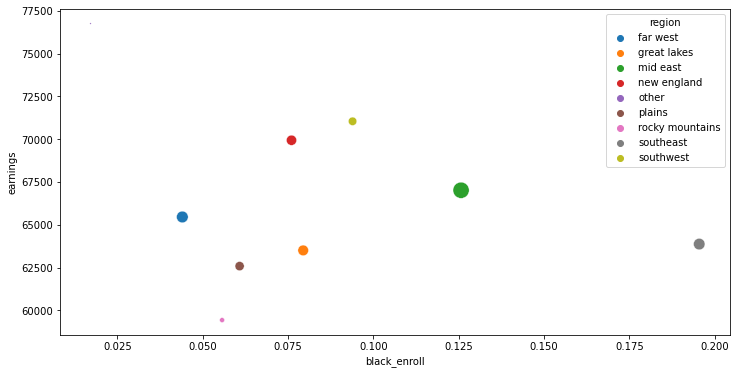

In [32]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn2 = earn.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='black_enroll', y='earnings',hue='region',data=earn2, s=earn.groupby(['region']).count()['name'])

#### Hispanic Enrollment

<ipython-input-33-e0fffc4e5876>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='CalTech', xy=(0.1221, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-33-e0fffc4e5876>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Georgetown University', xy=(0.0784, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-33-e0fffc4e5876>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='SUNY Downstate Health Sciences University', xy=(0.1154, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-in

<AxesSubplot:xlabel='hispanic_enroll', ylabel='earnings'>

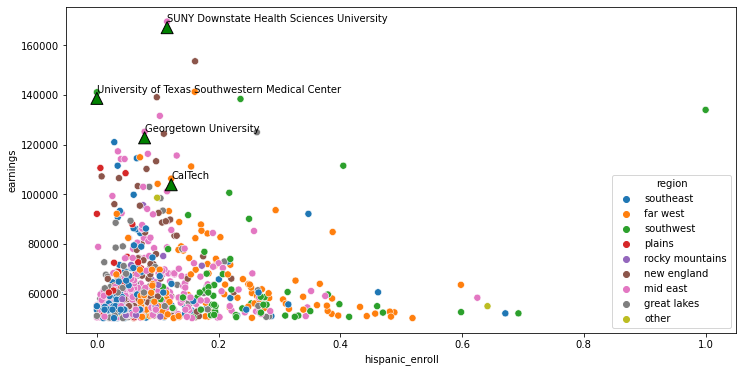

In [33]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]

plt.figure(figsize=(12,6))
plt.annotate(s='CalTech', xy=(0.1221, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='Georgetown University', xy=(0.0784, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='SUNY Downstate Health Sciences University', xy=(0.1154, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='University of Texas Southwestern Medical Center', xy=(0, 141100.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='hispanic_enroll', y='earnings',hue='region',data=earn, s=50)

<AxesSubplot:xlabel='hispanic_enroll', ylabel='earnings'>

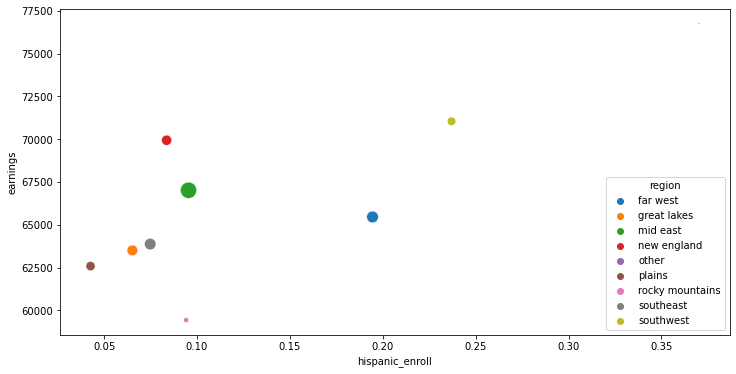

In [33]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn2 = earn.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='hispanic_enroll', y='earnings',hue='region',data=earn2, s=earn.groupby(['region']).count()['name'])

#### Asian Enrollment

<ipython-input-34-a9b9927052e6>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='CalTech', xy=(0.4385, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-34-a9b9927052e6>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Georgetown University', xy=(0.096, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-34-a9b9927052e6>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='SUNY Downstate Health Sciences University', xy=(0.1716, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-inp

<AxesSubplot:xlabel='asian_enroll', ylabel='earnings'>

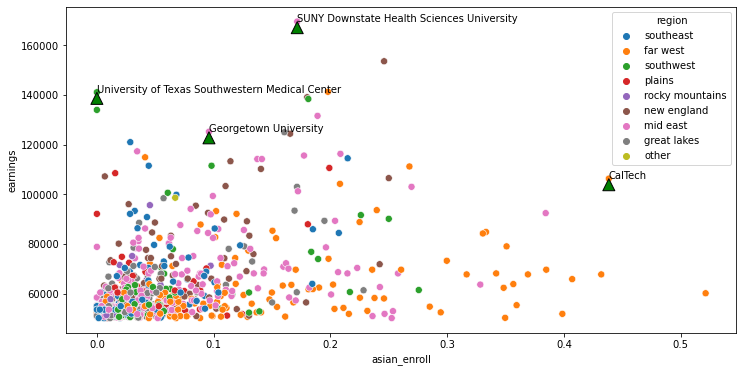

In [34]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]

plt.figure(figsize=(12,6))
plt.annotate(s='CalTech', xy=(0.4385, 106300), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='Georgetown University', xy=(0.096, 125200), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='SUNY Downstate Health Sciences University', xy=(0.1716, 169600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='University of Texas Southwestern Medical Center', xy=(0, 141100.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='asian_enroll', y='earnings',hue='region',data=earn, s=50)

<AxesSubplot:xlabel='asian_enroll', ylabel='earnings'>

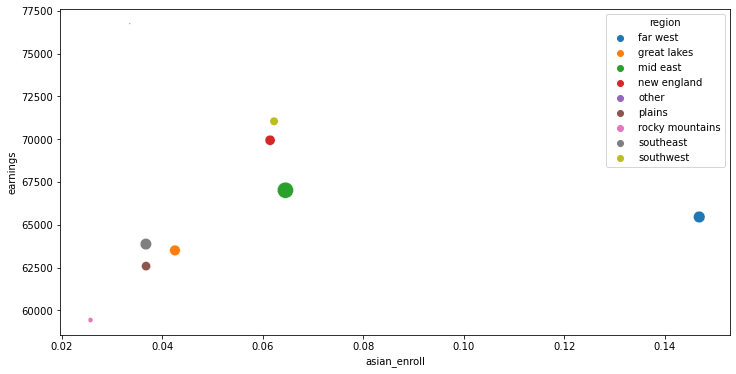

In [34]:
earn = df_merge.dropna(subset=['earnings'])
earn = earn[earn.earnings>50000]
earn2 = earn.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='asian_enroll', y='earnings',hue='region',data=earn2, s=earn.groupby(['region']).count()['name'])

### Admissions Rate vs Earnings

<ipython-input-48-2788f6159f92>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Stanford', xy=(0.0509, 141300.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-48-2788f6159f92>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='MIT', xy=(0.0788, 153600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
<ipython-input-48-2788f6159f92>:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='Babson College', xy=(0.2631, 113300.0), arrowprops = dict(facecolor ='green', shrink = 0.05))


<AxesSubplot:xlabel='adm_rate', ylabel='earnings'>

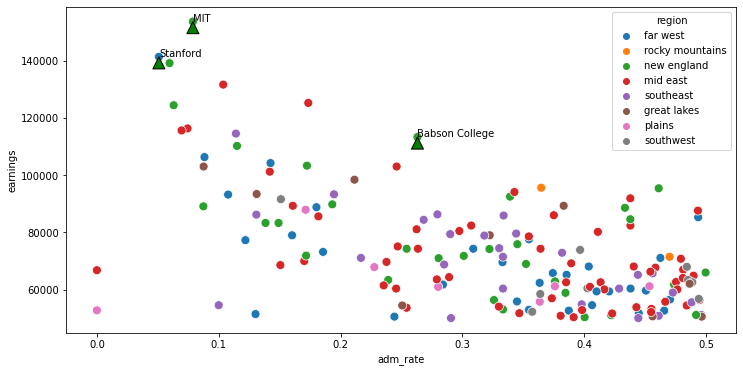

In [48]:
clean = df_merge.dropna(subset=['earnings','adm_rate'])
clean = clean[clean.earnings>50000]
clean = clean[clean.adm_rate<0.5]

plt.figure(figsize=(12,6))
plt.annotate(s='Stanford', xy=(0.0509, 141300.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='MIT', xy=(0.0788, 153600.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
plt.annotate(s='Babson College', xy=(0.2631, 113300.0), arrowprops = dict(facecolor ='green', shrink = 0.05))
sns.scatterplot(x='adm_rate', y='earnings',hue='region',data=clean, s=80)

<AxesSubplot:xlabel='adm_rate', ylabel='earnings'>

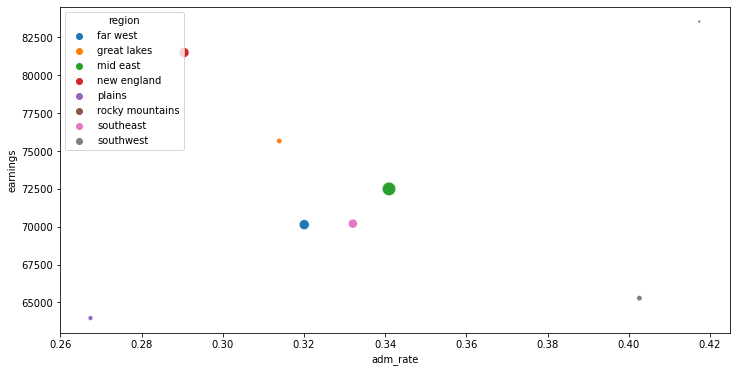

In [52]:
clean = df_merge.dropna(subset=['earnings','adm_rate'])
clean = clean[clean.earnings>50000]
clean = clean[clean.adm_rate<0.5]
clean2 = clean.groupby('region').mean()

plt.figure(figsize=(12,6))
sns.scatterplot(x='adm_rate', y='earnings',hue='region',data=clean2, s=clean.groupby(['region']).count()['name']*3)

### Race Enrollment by Region

#### White Enrollment

<ipython-input-134-9131a1a311ca>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(xLabel = "Region", yLabel = "% of White Enrollment")


[Text(0.5, 0, 'Region'), Text(0, 0.5, '% of White Enrollment')]

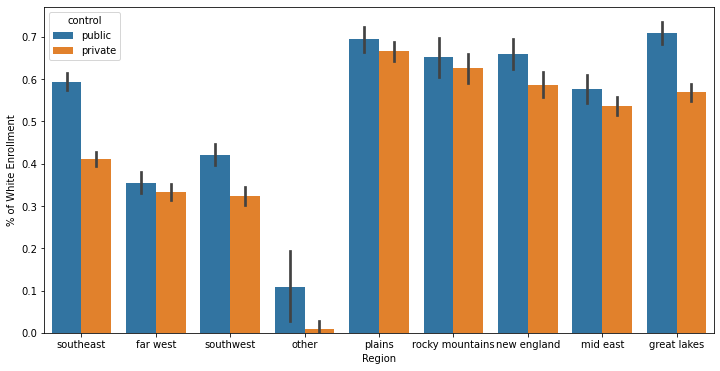

In [134]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_clean, x='region', y='white_enroll', hue='control')
ax.set(xLabel = "Region", yLabel = "% of White Enrollment")

#### Black Enrollment

<ipython-input-135-45ae89b3f2a9>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(xLabel = "Region", yLabel = "% of Black Enrollment")


[Text(0.5, 0, 'Region'), Text(0, 0.5, '% of Black Enrollment')]

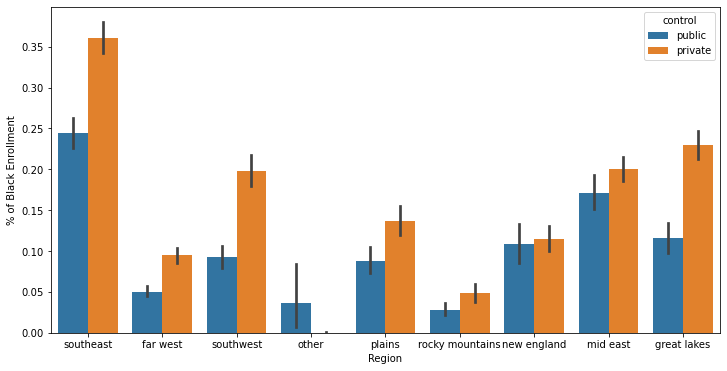

In [135]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_clean, x='region', y='black_enroll', hue='control')
ax.set(xLabel = "Region", yLabel = "% of Black Enrollment")

#### Hispanic Enrollment

<AxesSubplot:xlabel='region', ylabel='hispanic_enroll'>

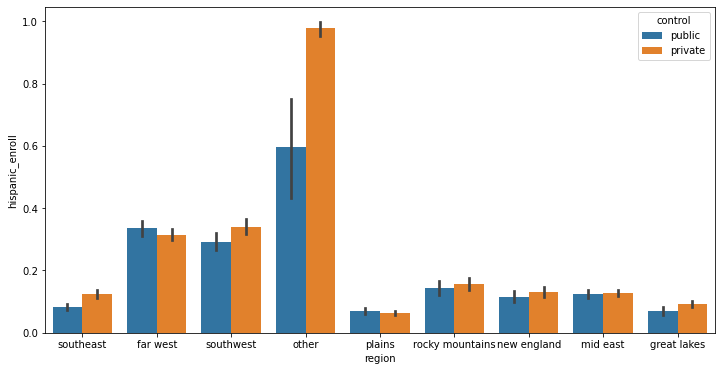

In [51]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='region', y='hispanic_enroll', hue='control')

#### Asian Enrollment

<AxesSubplot:xlabel='region', ylabel='asian_enroll'>

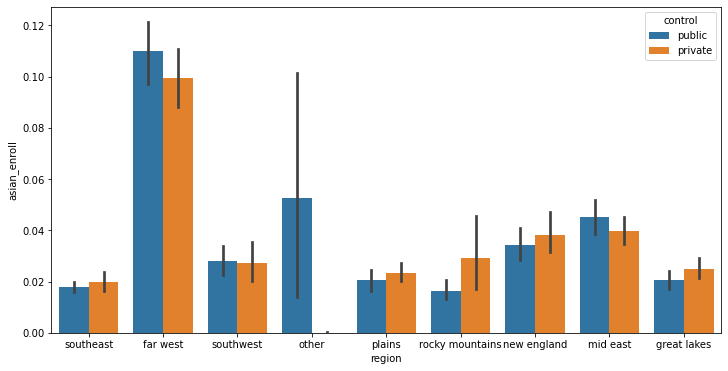

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_clean, x='region', y='asian_enroll', hue='control')

### Average SAT Score by Region

<ipython-input-52-7090ba787456>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(xLabel = "Region", yLabel = "SAT Score")


[Text(0.5, 0, 'Region'), Text(0, 0.5, 'SAT Score')]

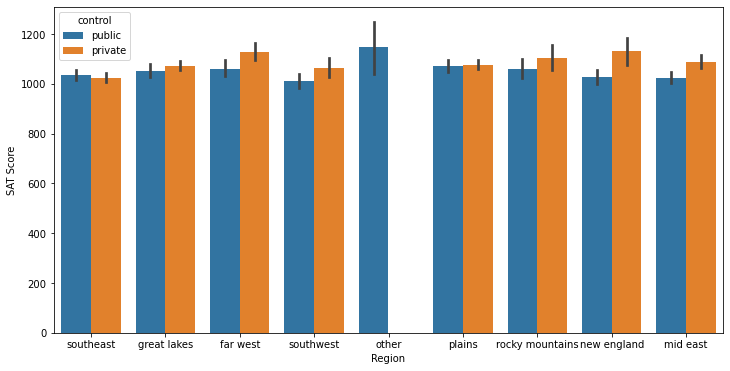

In [52]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_clean, x='region', y='avg_sat', hue='control')
ax.set(xLabel = "Region", yLabel = "SAT Score")

### Admissions Rate by Region

<ipython-input-51-4eb996cb2c05>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(xLabel = "Region", yLabel = "Admissions Rate")


[Text(0.5, 0, 'Region'), Text(0, 0.5, 'Admissions Rate')]

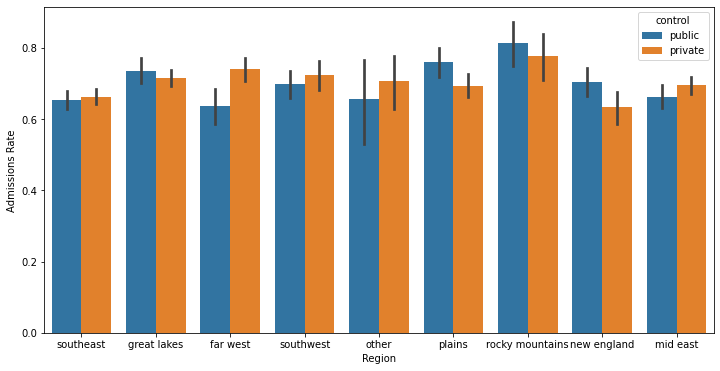

In [51]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_clean, x='region', y='adm_rate', hue='control')
ax.set(xLabel = "Region", yLabel = "Admissions Rate")

### % of Students who Received a Federal Loan by Region

<ipython-input-77-23d8b1b07e85>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(xLabel = "Region", yLabel = "% of Students who Received a Federal Loan")


[Text(0.5, 0, 'Region'),
 Text(0, 0.5, '% of Students who Received a Federal Loan')]

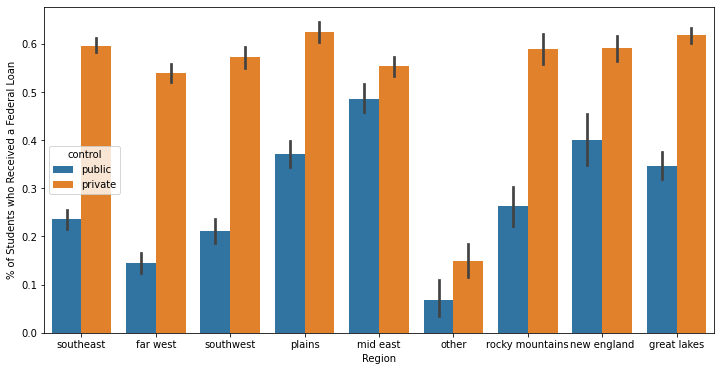

In [77]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_merge, x='region', y='loan', hue='control')
ax.set(xLabel = "Region", yLabel = "% of Students who Received a Federal Loan")

### Mean Earnings by Region

<ipython-input-49-da3ad0ea7009>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(xLabel = "Region", yLabel = "Mean Earnings of Working Students 10 Years After Entry")


[Text(0.5, 0, 'Region'),
 Text(0, 0.5, 'Mean Earnings of Working Students 10 Years After Entry')]

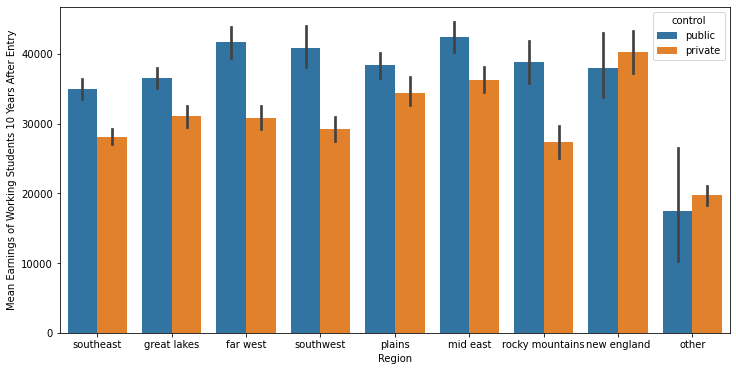

In [49]:
earn = df_merge.dropna(subset=['earnings'])

plt.figure(figsize=(12,6))
ax = sns.barplot(data=earn, x='region', y='earnings', hue='control')
ax.set(xLabel = "Region", yLabel = "Mean Earnings of Working Students 10 Years After Entry")